# Title
## Subtitle

Author name

# First slide

Content of the first slide

In [1]:
import numpy as np

In [2]:
np.random.randint(low=1, high=7, size=15)

array([1, 4, 6, 4, 1, 4, 2, 3, 6, 4, 6, 4, 4, 1, 2])

# Second slide

Example of ipyleaflet showing maps

In [3]:
from ipyleaflet import Map, Marker

In [4]:
center = (52.204793, 360.121558)
m = Map(center=center, zoom=15)
marker = Marker(location=center, draggable=True)
m.add_layer(marker);
display(m)

Map(center=[52.204793, 360.121558], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…

## Example of heatmap on top of map

In [5]:
from ipyleaflet import Map, Heatmap
from random import uniform
m = Map(center=(0, 0), zoom=2)

heatmap = Heatmap(
    locations=[[uniform(-80, 80), uniform(-180, 180), uniform(0, 1000)] for i in range(2000)],
    radius=20,
    gradient={0.4: 'blue', 0.6: 'cyan', 0.7: 'lime', 0.8: 'yellow', 1.0: 'red'}
)

m.add_layer(heatmap);
display(m)

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

# Opendata Bristol

Example of OpenData Bristol on top of Bristol's map

In [6]:
air_quality_bristol_query = 'https://opendata.bristol.gov.uk/api/records/1.0/search/?dataset=air-quality-data-continuous&q=&rows=1000&sort=date_time&facet=date_time&facet=coordinates&facet=temp'

import urllib, json

response = urllib.request.urlopen(air_quality_bristol_query)

data = json.loads(response.read())

print('Json root keys')
print(data.keys())
print('3 records')
data['records'][:3]

Json root keys
dict_keys(['nhits', 'parameters', 'records', 'facet_groups'])
3 records


[{'datasetid': 'air-quality-data-continuous',
  'recordid': '904639e615837a620e72ec95f8fe6c1586b8fba7',
  'fields': {'datestart': '2003-05-23T00:00:00+00:00',
   'date_time': '2021-02-16T12:00:00+00:00',
   'no': 46.94955,
   'geo_point_2d': [51.4278638883, -2.56374153315],
   'current': 'True',
   'nox': 105.665627,
   'location': 'Wells Road',
   'siteid': 270,
   'instrumenttype': 'Continuous (Reference)',
   'no2': 33.755625},
  'geometry': {'type': 'Point',
   'coordinates': [-2.56374153315, 51.4278638883]},
  'record_timestamp': '2021-02-16T12:15:07.824000+00:00'},
 {'datasetid': 'air-quality-data-continuous',
  'recordid': '9c3dcec78bc79ac711098d0f555fb594fa70a7c0',
  'fields': {'datestart': '2009-03-13T00:00:00+00:00',
   'date_time': '2021-02-16T12:00:00+00:00',
   'no': 7.887275,
   'geo_point_2d': [51.4780449714, -2.53523027459],
   'current': 'True',
   'nox': 39.97125,
   'location': 'Fishponds Road',
   'siteid': 463,
   'instrumenttype': 'Continuous (Reference)',
   'no2

In [7]:
def get_records(data, fields=None):
    '''
    data: json object
    fields: list of strings
        Each dictionary entry with the field name is retrieved in the given order
    return
    list of list of values
    '''
    for record in data['records']:
        record_fields = record['fields']
        if fields is None:
            yield record_fields
        else:
            for key in fields:
                yield [record_fields.get(key, np.nan) for key in fields]

fields = ['date_time', 'geo_point_2d', 'temp', 'no', 'no2', 'nox']
                
record_values = list(get_records(data, fields=fields))

record_values[:5]

[['2021-02-16T12:00:00+00:00',
  [51.4278638883, -2.56374153315],
  nan,
  46.94955,
  33.755625,
  105.665627],
 ['2021-02-16T12:00:00+00:00',
  [51.4278638883, -2.56374153315],
  nan,
  46.94955,
  33.755625,
  105.665627],
 ['2021-02-16T12:00:00+00:00',
  [51.4278638883, -2.56374153315],
  nan,
  46.94955,
  33.755625,
  105.665627],
 ['2021-02-16T12:00:00+00:00',
  [51.4278638883, -2.56374153315],
  nan,
  46.94955,
  33.755625,
  105.665627],
 ['2021-02-16T12:00:00+00:00',
  [51.4278638883, -2.56374153315],
  nan,
  46.94955,
  33.755625,
  105.665627]]

In [8]:
m = Map(center=(51.454500, -2.587900), zoom=12)
gradient={0.4: 'blue', 0.6: 'cyan', 0.7: 'lime', 0.8: 'yellow', 1.0: 'red'}

position_id = []

field_map = {field: i for i, field in enumerate(fields)}
heatmap = Heatmap(
    locations=[[values[field_map['geo_point_2d']][0],
                values[field_map['geo_point_2d']][1],
                values[field_map['no']]] for values in record_values],
    radius=20,
    gradient=gradient
)

m.add_layer(heatmap);
display(m)

Map(center=[51.4545, -2.5879], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

# Pandas dataframe

We will use pandas to analyse the data

In [9]:
import pandas as pd
df_records = pd.DataFrame(record_values, columns=fields)
df_records[['Longitude', 'Latitude']] = pd.DataFrame(df_records['geo_point_2d'].tolist(), index= df_records.index)
df_records = df_records.sort_values(by='date_time')
df_records = df_records.drop_duplicates(subset=['Longitude', 'Latitude'], keep='first')
df_records

,date_time,geo_point_2d,temp,no,no2,nox,Longitude,Latitude
5999,2021-02-10T10:00:00+00:00,"[51.4579497129, -2.58398909033]",NaN,54.507000,56.801000,140.377000,51.457950,-2.583989
5975,2021-02-10T10:00:00+00:00,"[51.432675707, -2.60495665673]",-1.164835,48.695350,66.602812,141.285936,51.432676,-2.604957
5969,2021-02-10T10:00:00+00:00,"[51.4278638883, -2.56374153315]",NaN,8.916050,7.793438,21.515625,51.427864,-2.563742
5976,2021-02-10T10:00:00+00:00,"[51.4780449714, -2.53523027459]",NaN,19.411634,28.241251,58.012501,51.478045,-2.535230
5963,2021-02-10T10:00:00+00:00,"[51.4552693825, -2.59664882861]",NaN,37.976000,70.983499,129.227626,51.455269,-2.596649
5993,2021-02-10T10:00:00+00:00,"[51.4628294172, -2.58454081635]",NaN,NaN,NaN,NaN,51.462829,-2.584541
5987,2021-02-10T10:00:00+00:00,"[51.4417471802, -2.55995583224]",NaN,10.537150,27.205313,43.413751,51.441747,-2.559956


# Binary probabilistic classifier

Simulation of a probabilistic classifier with a linear transformation to convert raw values into the interval [0, 1]

In [10]:
df_records = df_records.dropna(subset=['no'])
df_records['no_scaled'] = (df_records['no'] - df_records['no'].min())/(df_records['no'].max() - df_records['no'].min())

<ipython-input-10-a91d0c5005a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_records['no_scaled'] = (df_records['no'] - df_records['no'].min())/(df_records['no'].max() - df_records['no'].min())


In [11]:
locations = df_records[['Longitude', 'Latitude', 'no_scaled']].values
locations = [list(row) for row in locations]

In [12]:
m = Map(center=(51.454500, -2.587900), zoom=12)
gradient={0.0: 'blue', 1.0: 'red'}

heatmap = Heatmap(
    locations=locations,
    radius=40,
    gradient=gradient,
    min_opacity=0.5,
)

m.add_layer(heatmap);
display(m)

Map(center=[51.4545, -2.5879], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…

In [13]:
df_records

,date_time,geo_point_2d,temp,no,no2,nox,Longitude,Latitude,no_scaled
5999,2021-02-10T10:00:00+00:00,"[51.4579497129, -2.58398909033]",NaN,54.507000,56.801000,140.377000,51.457950,-2.583989,1.000000
5975,2021-02-10T10:00:00+00:00,"[51.432675707, -2.60495665673]",-1.164835,48.695350,66.602812,141.285936,51.432676,-2.604957,0.872526
5969,2021-02-10T10:00:00+00:00,"[51.4278638883, -2.56374153315]",NaN,8.916050,7.793438,21.515625,51.427864,-2.563742,0.000000
5976,2021-02-10T10:00:00+00:00,"[51.4780449714, -2.53523027459]",NaN,19.411634,28.241251,58.012501,51.478045,-2.535230,0.230212
5963,2021-02-10T10:00:00+00:00,"[51.4552693825, -2.59664882861]",NaN,37.976000,70.983499,129.227626,51.455269,-2.596649,0.637406
5987,2021-02-10T10:00:00+00:00,"[51.4417471802, -2.55995583224]",NaN,10.537150,27.205313,43.413751,51.441747,-2.559956,0.035557


# Simulate probabilistic linear classifier

We start by a uniform value through all the map.

The points are uniformly distributed across the latitude and longitude at 2 degrees on every direction. Because the equirectangular projection the latitude degrees seem to be more spaced on the poles, and very concentrated near the equator. The longitudinal distribution is not affected on this representation. 

In [14]:
from ipyleaflet import Map, Heatmap
from random import uniform
m = Map(center=(0, 0), zoom=0)


nlon, nlat = (180, 90)
lon = np.linspace(-180, 180, nlon)
lat = np.linspace(-90, 90, nlat)
lonv, latv = np.meshgrid(lon, lat, indexing='ij')
probs = np.ones_like(lonv)*500 #100*(latv - latv.min())/(latv.max() - latv.min())

heatmap = Heatmap(
    locations=[[latv[i,j], lonv[i,j], probs[i,j]] for i in range(nlon) for j in range(nlat)],
    radius=10,
    gradient={0.0: 'blue', 1.0: 'red'}
)

m.add_layer(heatmap);
display(m)

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

# North vs South

Simulation of a probabilistic classifier that predicts the probability of North vs South poles.

We will first generate a grid of 2 degrees in every direction and assign probabilities and will visualise in a Matplotlib heatmap.

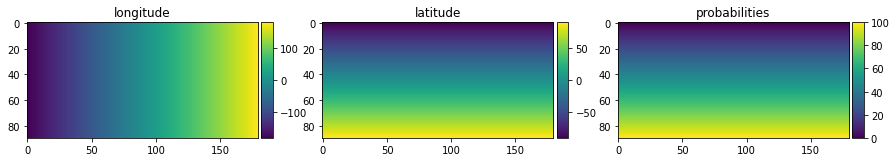

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

nlon, nlat = (180, 90)
lon = np.linspace(-180, 180, nlon)
lat = np.linspace(-90, 90, nlat)
lonv, latv = np.meshgrid(lon, lat, indexing='ij')
probs = 100*(latv - latv.min())/(latv.max() - latv.min())

fig = plt.figure(figsize=(15, 5))
for i, (name, matrix) in enumerate({'longitude': lonv, 'latitude': latv, 'probabilities': probs}.items()):
    ax = fig.add_subplot(1, 3, i+1)
    ax.set_title(name)
    img = ax.imshow(matrix.T)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(img, cax=cax)

If we show the probability of North it seems that the probability of South has an alpha transparency of 1.0. Making it difficult to see the South (yellow) predictions.

In [16]:
from ipyleaflet import Map, Heatmap
from random import uniform
m = Map(center=(0, 0), zoom=0)

nlon, nlat = (180, 90)
lon = np.linspace(-180, 180, nlon)
lat = np.linspace(-90, 90, nlat)
lonv, latv = np.meshgrid(lon, lat, indexing='ij')
probs = 100*(latv - latv.min())/(latv.max() - latv.min())

heatmap = Heatmap(
    locations=[[latv[i,j], lonv[i,j], probs[i,j]] for i in range(nlon) for j in range(nlat)],
    radius=20,
    gradient={0.0: 'yellow', 0.5: 'green', 1.0: 'blue'}
)

m.add_layer(heatmap);
display(m)

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

In [17]:
m = Map(center=(0, 0), zoom=0)

probs_s = 100 - probs

heatmap = Heatmap(
    locations=[[latv[i,j], lonv[i,j], probs_s[i,j]] for i in range(nlon) for j in range(nlat)],
    radius=20,
    gradient={0.0: 'blue', 0.5: 'green', 1.0: 'yellow'}
)

m.add_layer(heatmap);
display(m)

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

It is necessary to show the probability of both classes in separate layers, given that the probabilities near 0 have the alpha channel to 1 and are not visible. 

In [18]:
from ipyleaflet import Map, Heatmap
from random import uniform
m = Map(center=(0, 0), zoom=0)


nlon, nlat = (180, 90)
lon = np.linspace(-180, 180, nlon)
lat = np.linspace(-90, 90, nlat)
lonv, latv = np.meshgrid(lon, lat, indexing='ij')
probs = 100*(latv - latv.min())/(latv.max() - latv.min())

heatmap = Heatmap(
    locations=[[latv[i,j], lonv[i,j], probs[i,j]] for i in range(nlon) for j in range(nlat)],
    radius=20,
    gradient={0.0: 'yellow', 0.5: 'green', 1.0: 'blue'}
)

m.add_layer(heatmap);

probs = 100 - probs

heatmap = Heatmap(
    locations=[[latv[i,j], lonv[i,j], probs[i,j]] for i in range(nlon) for j in range(nlat)],
    radius=20,
    gradient={0.0: 'blue', 0.5: 'green', 1.0: 'yellow'}
)

m.add_layer(heatmap);
display(m)

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

# Avoid projection deformation

In order to avoid the deformation of the grid from the sphere to the rectangle we can zoom into a smaller region of the map, as the deformation is less apparent. But the zoom and the heatmap still behave in a non-ideal way. It is very difficult to adjust a proper set of parameters for the heatmap to work with short and long zoom levels.

In [19]:
from ipyleaflet import Map, Heatmap
from random import uniform
m = Map(center=(55, 0), zoom=4.3)


nlon, nlat = (100, 100)
lon = np.linspace(-10, 10, nlon)
lat = np.linspace(50, 60, nlat)
lonv, latv = np.meshgrid(lon, lat, indexing='ij')
probs = 100*(latv - latv.min())/(latv.max() - latv.min())

color_per_class = [{0.0: 'yellow', 0.5: 'green', 1.0: 'blue'},
                   {0.0: 'blue', 0.5: 'green', 1.0: 'yellow'}]

for (gradient, values) in zip(*[color_per_class, [probs, 100 - probs]]):
    heatmap = Heatmap(
        locations=[[latv[i,j], lonv[i,j], values[i,j]] for i in range(nlon) for j in range(nlat)],
        radius=20,
        gradient=gradient
    )

    m.add_layer(heatmap);

display(m)

Map(center=[55, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [20]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


# Country contours and Search Engine

The following is an example of country contours and the option to search for country names.

In [21]:
import json
import os
import requests

from ipyleaflet import AwesomeIcon, GeoJSON, Map, Marker, LayerGroup, SearchControl

m = Map(zoom=3, center=[19.1646, 72.8493])

if not os.path.exists('countries.geo.json'):
      url = 'https://raw.githubusercontent.com/jupyter-widgets/ipyleaflet/master/examples/countries.geo.json'
      r = requests.get(url)
      with open('countries.geo.json', 'w') as f:
        f.write(r.content.decode("utf-8"))

with open("countries.geo.json") as f:
    data = json.load(f)

countries = GeoJSON(data=data)

layer_group = LayerGroup(layers=(countries,))
marker = Marker(icon=AwesomeIcon(name="check", marker_color='green', icon_color='darkred'))

m.add_control(SearchControl(
  position="topleft",
  layer=layer_group,
  zoom=4,
  property_name='name',
  marker=marker
))

m

Map(center=[19.1646, 72.8493], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zo…